In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d corrieaar/apartment-rental-offers-in-germany

In [ ]:
!ls

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('apartment-rental-offers-in-germany.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()
import pandas as pd
data = pd.read_csv('/content/files/immo_data.csv')


In [ ]:
data.describe()

deleting all the columns with more than 50% null values.

In [ ]:
for col in data.columns:
  if (data[col].isna().sum()/ len(data))>0.5:
    data.drop(col, inplace=True, axis=1)

no duplicates were found

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.isna().sum()

**deleting the unwanted text information**

geo_bln
bundesland (state), same as regio1

regio2
District or Kreis, same as geo krs

geo_krs
district, above ZIP code

regio3
City/town

In [ ]:
data.drop(["geo_bln", "geo_krs" ], inplace=True, axis=1)

In [ ]:
data.drop(["scoutId"], inplace=True, axis=1)

In [ ]:
data.drop(["description", "facilities" ], inplace=True, axis=1)

In [ ]:
data.drop(["houseNumber"], inplace=True, axis=1)

In [ ]:
data.drop(["streetPlain"], inplace=True, axis=1)

In [ ]:
data.drop(["street"], inplace=True, axis=1)

filling null values

In [ ]:
pd.set_option('display.max_columns', None)
data

In [ ]:
data['serviceCharge'].fillna((data['serviceCharge'].mean()), inplace=True)

In [ ]:
data['heatingType'].mode()

0    central_heating
dtype: object

In [ ]:
data['heatingType'].fillna(("central_heating"), inplace=True)

In [ ]:
data['telekomTvOffer'].fillna(("NONE"), inplace=True)

In [ ]:
data['pricetrend'].fillna((0), inplace=True)

In [ ]:
data['telekomUploadSpeed'].fillna((0), inplace=True)

In [ ]:
data['yearConstructed'].fillna((data['yearConstructed'].mean()), inplace=True)

In [ ]:
data['firingTypes'].mode()

0    gas
dtype: object

In [ ]:
data['firingTypes'].fillna(("gas"), inplace=True)

In [ ]:
data['yearConstructedRange'].mode()

0    1.0
dtype: float64

In [ ]:
data['yearConstructedRange'].fillna((1.0), inplace=True)

In [ ]:
data['condition'].fillna(("negotiable"), inplace=True)

In [ ]:
data['interiorQual'].fillna(("normal"), inplace=True)

In [ ]:
data['petsAllowed'].fillna(("negotiable"), inplace=True)

In [ ]:
data['typeOfFlat'].mode()

0    apartment
dtype: object

In [ ]:
data['typeOfFlat'].fillna(("apartment"), inplace=True)

In [ ]:
data['thermalChar'].mode()

0    105.0
dtype: float64

In [ ]:
data['thermalChar'].fillna((105.0), inplace=True)

In [ ]:
data['floor'].mode()

0    1.0
dtype: float64

In [ ]:
data['floor'].fillna((1.0), inplace=True)

In [ ]:
data['numberOfFloors'].mode()

0    3.0
dtype: float64

In [ ]:
data['numberOfFloors'].fillna((3.0), inplace=True)

In [ ]:
data['totalRent'].fillna( data["baseRent"] + data["serviceCharge"]  , inplace=True)

In [ ]:
data.isna().sum()

In [ ]:
data.shape

(268850, 34)

**deleting the ouliers more than 3std from their mean**

In [ ]:
import numpy as np
colnames_numerics_only = data.select_dtypes(include=np.number).columns.tolist()
colnames_numerics_only

['serviceCharge',
 'picturecount',
 'pricetrend',
 'telekomUploadSpeed',
 'totalRent',
 'yearConstructed',
 'yearConstructedRange',
 'baseRent',
 'livingSpace',
 'baseRentRange',
 'geo_plz',
 'noRooms',
 'thermalChar',
 'floor',
 'numberOfFloors',
 'noRoomsRange',
 'livingSpaceRange']

In [ ]:
from scipy import stats
for col in colnames_numerics_only:
  data = data[(np.abs(stats.zscore(data[col]))< 3)]



In [ ]:
data.shape

(254442, 34)

In [ ]:
data

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,firingTypes,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,840.00,1965.0,oil,False,True,2.0,595.0,86.00,well_kept,normal,negotiable,False,4,ground_floor,44269,4.0,181.40,1.0,3.0,4,True,4,Dortmund,Schüren,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.0,934.00,1871.0,gas,False,False,1.0,800.0,89.00,refurbished,normal,no,False,5,ground_floor,67459,3.0,105.00,1.0,3.0,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.4,1300.00,2019.0,gas,False,True,9.0,965.0,83.80,first_time_use,sophisticated,negotiable,True,6,apartment,1097,3.0,105.00,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.0,401.15,1964.0,district_heating,False,False,2.0,343.0,58.15,negotiable,normal,negotiable,False,2,other,9599,3.0,86.00,3.0,3.0,3,False,2,Mittelsachsen_Kreis,Freiberg,May19
4,Bremen,138.00,self_contained_central_heating,NONE,False,True,19,2.46,0.0,903.00,1950.0,gas,False,False,1.0,765.0,84.97,refurbished,normal,negotiable,False,5,apartment,28213,3.0,188.90,1.0,3.0,3,False,4,Bremen,Neu_Schwachhausen,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,False,True,0,2.74,10.0,910.00,2016.0,geothermal,False,True,9.0,820.0,90.00,mint_condition,sophisticated,no,False,6,roof_storey,82390,3.0,105.00,1.0,3.0,3,False,4,Weilheim_Schongau_Kreis,Eberfing,Feb20
268846,Hessen,220.00,gas_heating,NONE,False,True,12,6.49,0.0,1150.00,1983.0,gas,True,False,4.0,930.0,115.00,well_kept,sophisticated,negotiable,False,6,apartment,68519,3.5,105.00,1.0,1.0,3,False,5,Bergstraße_Kreis,Viernheim,May19
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,False,True,21,2.90,40.0,930.00,1965.0,gas,False,True,2.0,650.0,95.00,well_kept,normal,negotiable,False,5,apartment,65552,4.0,160.77,1.0,2.0,4,True,4,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,Feb20
268848,Nordrhein_Westfalen,175.00,heat_pump,NONE,True,True,16,4.39,0.0,1015.00,2019.0,gas,False,True,9.0,840.0,70.00,first_time_use,sophisticated,no,True,6,apartment,51069,2.0,24.70,1.0,5.0,2,False,3,Köln,Dellbrück,May19


In [ ]:
data = pd.get_dummies(data, columns=["heatingType"]).head()

In [ ]:
heatingType_central_heating	heatingType_combined_heat_and_power_plant	heatingType_district_heating	heatingType_electric_heating	heatingType_floor_heating	heatingType_gas_heating	heatingType_heat_pump	heatingType_night_storage_heater	heatingType_oil_heating	heatingType_self_contained_central_heating	heatingType_solar_heating	heatingType_stove_heating	heatingType_wood_pellet_heating

In [ ]:
# df = data2[['serviceCharge', 'telekomUploadSpeed']]
#, 'heatingType_central_heating',	'heatingType_combined_heat_and_power_plant',	'heatingType_district_heating',	'heatingType_electric_heating',	'heatingType_floor_heating',	'heatingType_gas_heating',	'heatingType_heat_pump',	'heatingType_night_storage_heater',	'heatingType_oil_heating',	'heatingType_self_contained_central_heating',	'heatingType_solar_heating',	'heatingType_stove_heating',	'heatingType_wood_pellet_heating'

In [ ]:
data2= data.reset_index(drop=True)

In [ ]:
df = data2[['serviceCharge', 'telekomUploadSpeed']]

In [ ]:
y=data2.totalRent

In [ ]:
y=np.asarray(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df, y, test_size = 0.33, random_state = 5)

In [ ]:
X_train_standardized = (X_train - X_train .mean()) / X_train.std()
X_test_standardized  = (X_test - X_train.mean()) /  X_train.std()

In [ ]:
def error_function(y_actual,y_predicted):
    error = 0
    for i in range(0,len(y_actual)):
        error =  error + pow((y_actual[i] - y_predicted[i]),2)
        return error/(2*len(y_actual))

def y_predicted(w,x):
    y_pred = np.zeros(len(x))
    for i in range(0,len(x)):
        for j in range(0,len(w)):
            y_pred[i] = y_pred[i]+(w[j]*x[i][j] + w[-1])
    return y_pred

def gradient_descent(y_actual,y_pred,x):
    grad = np.zeros(x.shape[1])
    for i in range(x.shape[1]):
        for j in range(0,len(y_actual)):
            grad[i] = - (y_actual[j] - y_pred[j])*x[j][i] + grad[i]
    return grad/len(y_actual)


def weights(x_train,y_train,num_iterations,learning_rate):
    no_of_rows = x_train.shape[0]
    no_of_columns = x_train.shape[1]
    new_x_train = np.ones((no_of_rows,no_of_columns+1))
    new_x_train[:,0:no_of_columns] = x_train
    w = np.zeros(no_of_columns)
    w =np.append(w,1)
    for i in range(0,num_iterations):
        y_pred = y_predicted(w,new_x_train)
        error = error_function(y_train,y_pred)
        print("mean square error: ",error,"after",i,"th iteration")
        MSE_points.append(error)
        grad = gradient_descent(y_train,y_pred,new_x_train)
        w = w - learning_rate*grad
        learning_rate = learning_rate/1.05                                # Learning rate Decay 
    return w

def regression_test(x_test,w):
    row = x_test.shape[0]
    column = x_test.shape[1]
    new_x_test = np.ones((row,column+1))
    new_x_test[:,0:column] = x_test
    y_pred = y_predicted(w,new_x_test)
    return(y_pred)

In [ ]:
MSE_points = []
num_iterations = 300
learning_rate = 0.1
w = weights(X_train_standardized,Y_train, num_iterations, learning_rate)
Y_pred = regression_test(X_test_standardized,w)
error_function(Y_test,Y_pred)

mean square error:  0.5347644243177926 after 0 th iteration
mean square error:  0.06601618282490225 after 1 th iteration
mean square error:  1.1324975251179627e-06 after 2 th iteration
mean square error:  0.020300677848953688 after 3 th iteration
mean square error:  0.04817717427157663 after 4 th iteration
mean square error:  0.06770865327565047 after 5 th iteration
mean square error:  0.07849445608876271 after 6 th iteration
mean square error:  0.08303845948009791 after 7 th iteration
mean square error:  0.0836754598590317 after 8 th iteration
mean square error:  0.08205478934365372 after 9 th iteration
mean square error:  0.07923323048214538 after 10 th iteration
mean square error:  0.07585538580734492 after 11 th iteration
mean square error:  0.07230103344162435 after 12 th iteration
mean square error:  0.06878599257445311 after 13 th iteration
mean square error:  0.0654266779567156 after 14 th iteration
mean square error:  0.06228018179738396 after 15 th iteration
mean square error

0.0014942218948195318

**Task2**

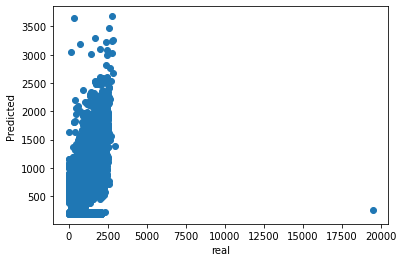

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

lm = LinearRegression()
lm.fit(X_train, Y_train)


y_pred_from_sklearn = lm.predict(X_test)

plt.scatter(Y_test, y_pred_from_sklearn)
plt.xlabel("real")
plt.ylabel("Predicted ")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

a = mean_squared_error(Y_test, Y_pred)
b = mean_squared_error(Y_test, y_pred_from_sklearn)

print(f"MSE from  implemented model:{a}")
print(f"MSE from sklearn model:{b}")

MSE from  implemented model:97423.86273068888
MSE from sklearn model:96448.07043260714


**Task3**

In [ ]:
df = data2[['serviceCharge', 'telekomUploadSpeed', 'picturecount', 'pricetrend','totalRent', 'yearConstructed']]

In [ ]:
y=data2.totalRent

In [ ]:
y=np.asarray(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df, y, test_size = 0.33, random_state = 5)

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, Y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(Y_train,pred_train_rr)))
print(r2_score(Y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(Y_test,pred_test_rr))) 
print(r2_score(Y_test, pred_test_rr))

1.336477672228809e-10
1.0
8.313455893689089e-11
1.0


**Lasso Regression**

In [ ]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, Y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(Y_train,pred_train_lasso)))
print(r2_score(Y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(Y_test,pred_test_lasso))) 
print(r2_score(Y_test, pred_test_lasso))

0.0005389720103169096
0.9999999999990155
0.0005036027234986163
0.9999999999985684
